In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# ### Analysis Project 
# 
# ### 2022-11-2

# ### Statistical significance tests on movie ratings data
                    
# We acknowledge any outcome could be due to
# chance. Our only question is how likely that is by chance. If it is
# implausibly unlikely, we reject the assumption that it was just due to
# chance. And either the null hypothesis is true or not, so if we reject it
# is plausible, it probably means that our treatment did have an effect.                  
                    
#%% Before we do the stats, let's talk about the psychology of movie ratings:
    
# Hypothesis 1: There is no difference in the distribution of ratings between the two movies.

# Hypothesis 2: Distribution of ratings for one of the movies will be different from the other.

# Make sure that you actually have 2 plausible outcomes before doing the
# study. If the outcome is a foregone conclusion, it's not science. Science
# is about being open to any possible outcome.

# Null hypothesis: There is no difference. 

# Let's implement the canonical data analysis cascade



# b. Load/import - libraries/packages:

import pandas as pd
import numpy as np
from scipy import stats, special
import matplotlib.pyplot as plt
import seaborn as sns


# Let me walk you through the null hypothesistesting framework at least once (just once). It is a bit arcane. It madesense to Fisher.         

### 1) Start with a hypothesis (something about the world you would wish toknow, whether it is true or not). 

### 2) State a null hypothesis and assume that it is 100% true (that there is no difference in the conditions of 1), e.g. here Matrix I rated the sameas Matrix II and III). This is essential to NHST. 

### 3) This is - at the face of it - an odd thing to do, because naively you would think that scientists look for probability (Hypothesis | Data) But that is unknowable. Which is why we do the study in the first place. What is calculable: Probability (Data | NULL hypothesis)You can assess the probability of the data given the null hypothesis

### 4) To get this probability, we represent the sample by a parameter like a sample mean, then transform the sample mean into a test statistic with a known distribution.

### 5) The area under the curve of the distribution of the test statistic in the tail (or tails, if it is a 2-tailed test) is the p value, in otherwords the probability of this result (or a more extreme one) given chancealone.

### 6) We compare the p value to a significance level alpha (typically 5% or 1%)

### 7) Decision point (Choice)
### a) If it is smaller than that, we decide to reject our assumption that the null hypothesis is true.
### b) If it is not smaller than that, we don't do anything because we alreadyassumed that the null hypothesis is true.                    

## 1. Loader / Transducer: Taking the inputs from their native form and putting it into something Python can use: a matrix

In [2]:
# How many of these are of inconsistent quality, as experienced by viewers?
# lets assume we should use a kruskal-wallis test, and ALSO compare distributions
# and ALSO compare mann whitney U pairwise

M = pd.read_csv('movieReplicationSet.csv')

star_wars = []
harry_potter = []
the_matrix = []
indiana_jones = []
jurassic_park = []
pirates_of_the_carribbean = []
toy_story = []
batman = []

all_series = [
    star_wars,
    harry_potter,
    the_matrix,
    indiana_jones,
    jurassic_park,
    pirates_of_the_carribbean,
    toy_story,
    batman
]


for x in range(400):
    
    title = M.columns[x]
    print(title)
    
    # make something to store properties
    props = {}
    props["title"] = title
    
    M1 = pd.to_numeric(M[title],errors='coerce').values
    props['dataframe_full'] = M1
    
    M1 = M1[np.isfinite(M1)]
    M_1 = M1[~np.isnan(M1)]
    M_1.astype(float)
    
    props['dataframe_clean'] = M1
    
    
    
    if "Star Wars" in title:
        
        print("YESSS")
        props["series"] = "Star Wars"
        star_wars.append(props)

    elif "Harry Potter" in title:
        props["series"] = "Harry Potter"
        harry_potter.append(props)

    elif "The Matrix" in title:
        props["series"] = "The Matrix"
        the_matrix.append(props)
        
    elif "Indiana Jones" in title:
        props["series"] = "Indiana Jones"
        indiana_jones.append(props)
        
    elif "Jurassic Park" in title:
        props["series"] = "Jurassic Park"
        jurassic_park.append(props)
        
    elif "Pirates of the Caribbean" in title:
        props["series"] = "Pirates of the Caribbean"
        pirates_of_the_carribbean.append(props)

    elif "Toy Story" in title:
        props["series"] = "Toy Story"
        toy_story.append(props)
        
    elif "Batman" in title:
        props["series"] = "Batman"
        batman.append(props)
        
    else:
        pass

The Life of David Gale (2003)
Wing Commander (1999)
Django Unchained (2012)
Alien (1979)
Indiana Jones and the Last Crusade (1989)
Snatch (2000)
Rambo: First Blood Part II (1985)
Fargo (1996)
Let the Right One In (2008)
Black Swan (2010)
King Kong (1976)
The Machinist (2004)
A Nightmare on Elm Street (1984)
Brazil (1985)
The Fast and the Furious (2001)
Change of Habit (1969)
American Beauty (1999)
Psycho (1960)
Terminator 3: Rise of the Machines (2003)
Night of the Living Dead (1968)
Man on Fire (2004)
Star Wars: Episode IV - A New Hope (1977)
YESSS
The Silence of the Lambs (1991)
The Others (2001)
Minority Report (2002)
Sling Blade (1996)
Schindler's List (1993)
3000 Miles to Graceland (2001)
Magnolia (1999)
The Karate Kid Part II (1986)
Planet of the Apes (2001)
The Godfather: Part II (1974)
Indiana Jones and the Temple of Doom (1984)
Indiana Jones and the Raiders of the Lost Ark (1981)
The Iron Giant (1999)
The Matrix Revolutions (2003)
North (1994)
The Lost World: Jurassic Park (19

In [3]:
print(len(batman))
    

3


In [4]:
def pairwise_mann_whitney_u(x,y):
    u1,p1 = stats.mannwhitneyu(x.astype(float),y.astype(float))
    return p1 

In [5]:
def get_combinations(stuff):
    
    combos = set()
    for L in range(len(stuff) + 1):
        for subset in itertools.combinations(stuff, 2):
            if subset not in combos:
                combos.add(subset)
                # print("adding ...")
                # print(subset)
                
    return combos

In [6]:
import itertools

plotting_kw = []


for y in all_series:
    series = y
    num_movies = len(series)


    movies = list(range(0, num_movies))
    combos = get_combinations(movies)

    p_values_mann_whitney = []

    for c in combos:
        # print(c)

    #     print(c[1])
    #     print(c[0])
        m1 = series[c[0]]['dataframe_clean']
        m2 = series[c[1]]['dataframe_clean']

        combinedData = np.transpose(np.array([m1,m2], dtype=object))

        p_value = pairwise_mann_whitney_u(m1.astype(float),m2.astype(float))
        p_values_mann_whitney.append(p_value)


    for i in range(num_movies): 

        x = series[i]    
        # print(x["title"])
        # add pairwise to every props hash in the list
        x["mwu_pairwise"] = p_values_mann_whitney
        # print("mann-whitney pairwise p-values:")
        # print(p_values_mann_whitney)

        x["ks"] = np.transpose(np.array([x["dataframe_clean"]], dtype=object))



    # # Nonparametric tests equivalent to ANOVA - Kruskal-Wallis:
    # # Same assumptions as above, but for more than 2 groups
    p = 0

    if num_movies == 1:
        h,p = stats.kruskal(series[0]["ks"])
        # should never get this case
    elif num_movies == 2:
        h,p = stats.kruskal(series[0]["ks"],series[1]["ks"])    
    elif num_movies == 3:
        h,p = stats.kruskal(series[0]["ks"],series[1]["ks"],series[2]["ks"]) 
    elif num_movies == 4:
        h,p = stats.kruskal(series[0]["ks"],series[1]["ks"],series[2]["ks"],series[3]["ks"]) 
    elif num_movies == 5:
        h,p = stats.kruskal(series[0]["ks"],series[1]["ks"],series[2]["ks"],series[3]["ks"],series[4]["ks"])
    elif num_movies == 6:
        h,p = stats.kruskal(series[0]["ks"],series[1]["ks"],series[2]["ks"],series[3]["ks"],series[4]["ks"],series[5]["ks"]) 
    elif num_movies == 7:
        h,p = stats.kruskal(series[0]["ks"],series[1]["ks"],series[2]["ks"],series[3]["ks"],series[4]["ks"],series[5]["ks"],series[6]["ks"]) 

    else:
        print("ERORRRRRRR")


    plotting_kw.append(p[0])
    for i in range(num_movies): 

        x = series[i]  
        x["kw_all_p"] = p

    
    
    

    

In [7]:
for y in all_series:
    series = y
    
    print(y[0]["title"])
    
    print("kruskal p-value:")
    print("\t%s" % y[0]["kw_all_p"][0])


    print("mann-whitney pairwise p-values:")
    y[0]["mwu_pairwise"].sort()
    
    for item in y[0]["mwu_pairwise"]:
        print("\t %s" % item)
    
    print("\n")

    


Star Wars: Episode IV - A New Hope (1977)
kruskal p-value:
	8.01647736660335e-48
mann-whitney pairwise p-values:
	 1.4828150905774305e-27
	 8.90780708842525e-26
	 1.1133359543819416e-20
	 1.469071265046627e-20
	 3.9477180779367727e-19
	 2.7865432291796803e-18
	 4.730789191200012e-15
	 2.8076243949481466e-13
	 0.02396734549765409
	 0.08189846600030656
	 0.11405028669275127
	 0.3034256316184082
	 0.4503093559063731
	 0.49468121553887734
	 0.5732544284765428


Harry Potter and the Sorcerer's Stone (2001)
kruskal p-value:
	0.34331950837289205
mann-whitney pairwise p-values:
	 0.09816683002933
	 0.15853367193772427
	 0.3619031010992797
	 0.46132782325826793
	 0.4973063104455706
	 0.8040524609201452


The Matrix Revolutions (2003)
kruskal p-value:
	3.1236517880781424e-11
mann-whitney pairwise p-values:
	 2.0084493077761915e-10
	 2.1376654433729527e-07
	 0.24981112383243775


Indiana Jones and the Last Crusade (1989)
kruskal p-value:
	6.27277563979608e-10
mann-whitney pairwise p-values:
	 7.6

['Star Wars', 'Harry Potter', 'The Matrix', 'Indiana Jones', 'Jurassic Park', 'Pirates of the Caribbean', 'Toy Story', 'Batman']
[8.01647736660335e-48, 0.34331950837289205, 3.1236517880781424e-11, 6.27277563979608e-10, 7.636930084362221e-11, 3.2901287079094474e-05, 5.065805156537524e-06, 4.2252969509030006e-42]


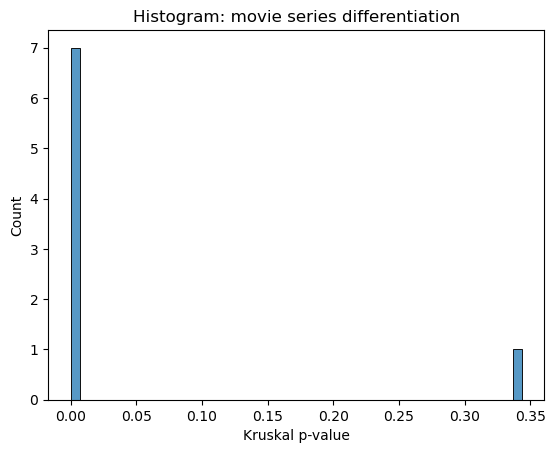

In [19]:
# now, plot the results



x = []
for i in all_series:
    name = i[0]["series"]
    x.append(name)

print(x)   
    
# xPos = np.array([1,2,3,4,5,6,7,8])

# print(xPos)

print(plotting_kw)

# plt.bar(xPos,plotting_kw)

# plt.xticks(xPos, x) # label the x_pos with the labels


# sns.histplot(sig, bins=bins, color="yellow", label="significant")


# sns.barplot(p_values)
bins=50
# sns.histplot(sig, bins=bins, color="yellow", label="significant")
sns.histplot(plotting_kw, bins=bins, label="not significant")

plt.title('Histogram: movie series differentiation')
plt.xlabel('Kruskal p-value')
plt.show()


[8.01647736660335e-48, 0.34331950837289205, 3.1236517880781424e-11, 6.27277563979608e-10, 7.636930084362221e-11, 3.2901287079094474e-05, 5.065805156537524e-06, 4.2252969509030006e-42]


(0.0, 5e-05)

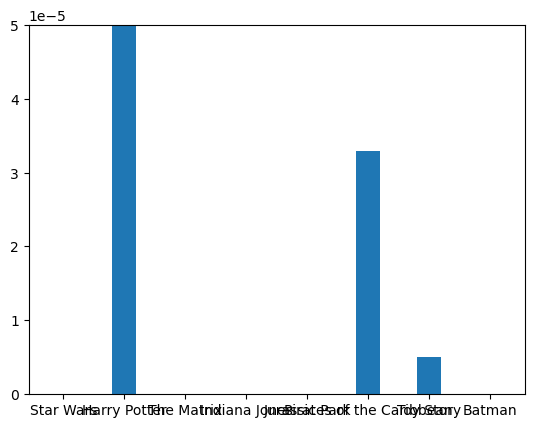

In [32]:
# okay, this is really difficult to plot because the data is all over the place.... just use the plot above i guess...




x = ['Star Wars', 'Harry Potter', 'The Matrix', 'Indiana Jones', 'Jurassic Park', 'Pirates of the Caribbean', 'Toy Story', 'Batman']
xPos = [1,2,3,4,5,6,7,8]
# y = [8.01647736660335e-48, 0.34331950837289205, 3.1236517880781424e-11, 6.27277563979608e-10, 7.636930084362221e-11, 3.2901287079094474e-05, 5.065805156537524e-06, 4.2252969509030006e-42]
y = plotting_kw

print(plotting_kw)

plt.bar(x, y, width = 0.4)

plt.ylim([0,0.00005])


In [33]:
# try to see what this data looks like in significance

alpha = 0.005

notsig = []
sig = []


for p in plotting_kw:
    
    if p > alpha:
        notsig.append(p)
    elif p < alpha:
        sig.append(p)
    else:
        print("exact")

        
        
        
print("sizeof notsig: %s" % len(notsig))
print("sizeof sig: %s" % len(sig))

effect = float(len(sig) / len(notsig)) * 100
print("proportion of series films inconsistent quality : %s" % effect)



sizeof notsig: 1
sizeof sig: 7
proportion of series films inconsistent quality : 700.0
